In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chargement
df = pd.read_csv('../data/creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# 1. SPLIT (Séparation 80% Train / 20% Test)
# stratify=y est obligatoire pour garder des fraudes dans les deux côtés
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set : {X_train.shape}")
print(f"Test set : {X_test.shape}")

Train set : (227845, 30)
Test set : (56962, 30)


In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Avant SMOTE (Train) : {Counter(y_train)}")

# On applique SMOTE uniquement sur le Train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Après SMOTE (Train) : {Counter(y_train_smote)}")
# Le Test n'est pas touché !

Avant SMOTE (Train) : Counter({0: 227451, 1: 394})
Après SMOTE (Train) : Counter({0: 227451, 1: 227451})


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Modèle 1 : Régression Logistique ---
print("⚡ Entraînement Logistic Regression...")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test)

# --- Modèle 2 : Random Forest ---
print("🌲 Entraînement Random Forest (Patientez...)...")
rf = RandomForestClassifier(n_estimators=50, random_state=42) # 50 arbres pour aller vite
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print("✅ Terminé !")

⚡ Entraînement Logistic Regression...


c:\Users\BOOTCAMP\Desktop\fraud-detection-project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🌲 Entraînement Random Forest (Patientez...)...
✅ Terminé !


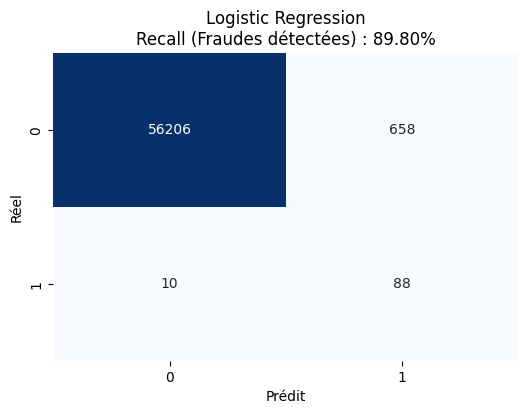

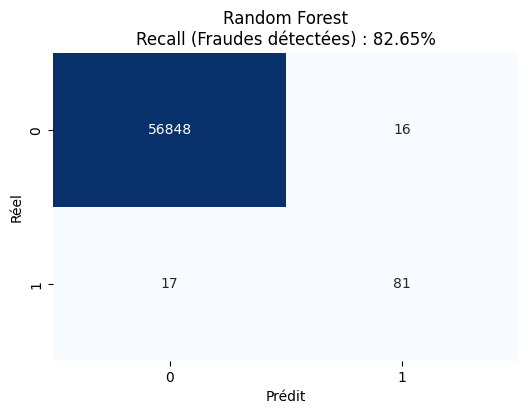

In [6]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{title}\nRecall (Fraudes détectées) : {recall:.2%}")
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()

# Comparaison Visuelle
plot_confusion(y_test, y_pred_lr, "Logistic Regression")
plot_confusion(y_test, y_pred_rf, "Random Forest")